In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuración
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', 50)

# Rutas
BASE_DIR = Path().resolve().parent
DATA_PATH = BASE_DIR / 'data' / 'gold' / 'model' / 'classification_monthly_dataset.parquet'

In [2]:
# Cargar datos
df = pd.read_parquet(DATA_PATH)
print(f"Shape: {df.shape}")
print(f"\nColumnas: {df.columns.tolist()}")
df.head()

Shape: (12984, 62)

Columnas: ['codigo_departamento', 'area', 'codigo_municipio', 'Shape_Leng', 'Shape_Area', 'n_centros_poblados', 'anio', 'mes', 'total_delitos', 'ABIGEATO', 'AMENAZAS', 'DELITOS SEXUALES', 'EXTORSION', 'HOMICIDIOS', 'HURTOS', 'LESIONES', 'VIOLENCIA INTRAFAMILIAR', 'femenino_adolescentes', 'femenino_adultos', 'femenino_menores', 'masculino_adolescentes', 'masculino_adultos', 'masculino_menores', 'poblacion_total', 'poblacion_menores', 'poblacion_adultos', 'poblacion_adolescentes', 'area_km2', 'densidad_poblacional', 'centros_por_km2', 'proporcion_menores', 'proporcion_adultos', 'proporcion_adolescentes', 'fecha', 'trimestre', 'es_fin_ano', 'n_dias_semana', 'n_fines_de_semana', 'n_festivos', 'n_dias_laborales', 'tasa_abigeato', 'tasa_amenazas', 'tasa_delitos sexuales', 'tasa_extorsion', 'tasa_homicidios', 'tasa_hurtos', 'tasa_lesiones', 'tasa_violencia intrafamiliar', 'mes_sin', 'mes_cos', 'lag_1', 'lag_3', 'lag_12', 'roll_mean_3', 'roll_mean_12', 'roll_std_3', 'roll_s

,codigo_departamento,area,codigo_municipio,Shape_Leng,Shape_Area,n_centros_poblados,anio,mes,total_delitos,ABIGEATO,AMENAZAS,DELITOS SEXUALES,EXTORSION,HOMICIDIOS,HURTOS,LESIONES,VIOLENCIA INTRAFAMILIAR,femenino_adolescentes,femenino_adultos,femenino_menores,masculino_adolescentes,masculino_adultos,masculino_menores,poblacion_total,poblacion_menores,...,n_fines_de_semana,n_festivos,n_dias_laborales,tasa_abigeato,tasa_amenazas,tasa_delitos sexuales,tasa_extorsion,tasa_homicidios,tasa_hurtos,tasa_lesiones,tasa_violencia intrafamiliar,mes_sin,mes_cos,lag_1,lag_3,lag_12,roll_mean_3,roll_mean_12,roll_std_3,roll_std_12,pct_change_1,pct_change_3,pct_change_12,nivel_riesgo,incremento_delitos
0,68,152.915686,68001,0.693489,0.012514,1,2010,1,486,0,26,22,3,11,36,283,105,22835,464037,59928,23336,415519,62405,1048060,122333,...,95,22,187,0.0,2.480774,2.099116,0.286243,1.049558,3.434918,27.002271,10.018510,0.5,0.866025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALTO,0
1,68,152.915686,68001,0.693489,0.012514,1,2010,2,353,0,11,24,2,14,21,245,36,22835,464037,59928,23336,415519,62405,1048060,122333,...,70,0,166,0.0,1.049558,2.289945,0.190829,1.335801,2.003702,23.376524,3.434918,0.866025,0.5,486.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.273663,NaN,NaN,ALTO,0
2,68,152.915686,68001,0.693489,0.012514,1,2010,3,438,0,21,30,2,13,17,301,54,22835,464037,59928,23336,415519,62405,1048060,122333,...,72,6,195,0.0,2.003702,2.862432,0.190829,1.240387,1.622045,28.719730,5.152377,1.0,0.0,353.0,NaN,NaN,425.666667,NaN,67.352308,NaN,0.240793,NaN,NaN,ALTO,1
3,68,152.915686,68001,0.693489,0.012514,1,2010,4,484,0,47,24,2,8,20,316,67,22835,464037,59928,23336,415519,62405,1048060,122333,...,77,16,209,0.0,4.484476,2.289945,0.190829,0.763315,1.908288,30.150946,6.392764,0.866025,-0.5,438.0,486.0,NaN,425.000000,NaN,66.460515,NaN,0.105023,-0.004115,NaN,ALTO,1
4,68,152.915686,68001,0.693489,0.012514,1,2010,5,505,0,35,35,2,17,30,299,87,22835,464037,59928,23336,415519,62405,1048060,122333,...,95,19,212,0.0,3.339503,3.339503,0.190829,1.622045,2.862432,28.528901,8.301051,0.5,-0.866025,484.0,353.0,NaN,475.666667,NaN,34.268547,NaN,0.043388,0.430595,NaN,ALTO,1


In [3]:
# Info general
print("=" * 60)
print("INFO GENERAL")
print("=" * 60)
print(f"\nTotal registros: {len(df):,}")
print(f"Período: {df['anio'].min()} - {df['anio'].max()}")
print(f"Municipios: {df['codigo_municipio'].nunique()}")
print(f"\nValores nulos:")
nulls = df.isnull().sum()
print(nulls[nulls > 0])

INFO GENERAL

Total registros: 12,984
Período: 2010 - 2025
Municipios: 87

Valores nulos:
lag_1              87
lag_3             261
lag_12           1044
roll_mean_3       174
roll_mean_12      957
roll_std_3        174
roll_std_12       957
pct_change_1       87
pct_change_3      261
pct_change_12    1044
dtype: int64


## 1. Balance de Clases - Nivel de Riesgo

In [4]:
# Balance de clases: nivel_riesgo
print("=" * 60)
print("BALANCE DE CLASES: nivel_riesgo")
print("=" * 60)

riesgo_counts = df['nivel_riesgo'].value_counts()
riesgo_pct = df['nivel_riesgo'].value_counts(normalize=True) * 100

balance_riesgo = pd.DataFrame({
    'count': riesgo_counts,
    'porcentaje': riesgo_pct.round(2)
})
# Ordenar por nivel lógico
order = ['BAJO', 'MEDIO', 'ALTO']
balance_riesgo = balance_riesgo.reindex(order)
print(balance_riesgo)

# Ratio de desbalance
ratio = riesgo_counts.max() / riesgo_counts.min()
print(f"\nRatio max/min: {ratio:.2f}")

BALANCE DE CLASES: nivel_riesgo
              count  porcentaje
nivel_riesgo                   
BAJO           4424       34.07
MEDIO          4188       32.26
ALTO           4372       33.67

Ratio max/min: 1.06


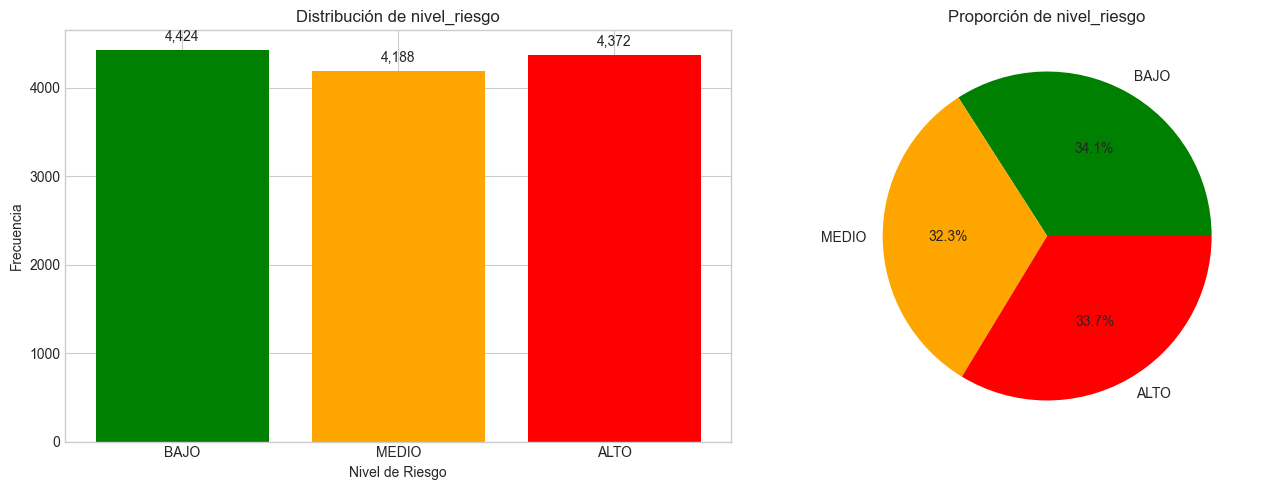

In [5]:
# Visualización nivel_riesgo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

colors = {'BAJO': 'green', 'MEDIO': 'orange', 'ALTO': 'red'}
order = ['BAJO', 'MEDIO', 'ALTO']

# Barplot
ax1 = axes[0]
riesgo_ordered = riesgo_counts.reindex(order)
bars = ax1.bar(order, riesgo_ordered.values, color=[colors[x] for x in order])
ax1.set_xlabel('Nivel de Riesgo')
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de nivel_riesgo')
for bar, val in zip(bars, riesgo_ordered.values):
    ax1.text(bar.get_x() + bar.get_width()/2, val + 100, f'{val:,}', ha='center')

# Pie chart
ax2 = axes[1]
ax2.pie(riesgo_ordered.values, labels=order, autopct='%1.1f%%', 
        colors=[colors[x] for x in order])
ax2.set_title('Proporción de nivel_riesgo')

plt.tight_layout()
plt.show()

## 2. Balance de Clases - Incremento Delitos

In [6]:
# Balance de clases: incremento_delitos
print("=" * 60)
print("BALANCE DE CLASES: incremento_delitos")
print("=" * 60)

incremento_counts = df['incremento_delitos'].value_counts()
incremento_pct = df['incremento_delitos'].value_counts(normalize=True) * 100

balance_incremento = pd.DataFrame({
    'count': incremento_counts,
    'porcentaje': incremento_pct.round(2)
})
balance_incremento.index = balance_incremento.index.map({0: 'Sin incremento (0)', 1: 'Con incremento (1)'})
print(balance_incremento)

# Ratio de desbalance
ratio = incremento_counts.max() / incremento_counts.min()
print(f"\nRatio max/min: {ratio:.2f}")

BALANCE DE CLASES: incremento_delitos
                    count  porcentaje
incremento_delitos                   
Sin incremento (0)   7591       58.46
Con incremento (1)   5393       41.54

Ratio max/min: 1.41


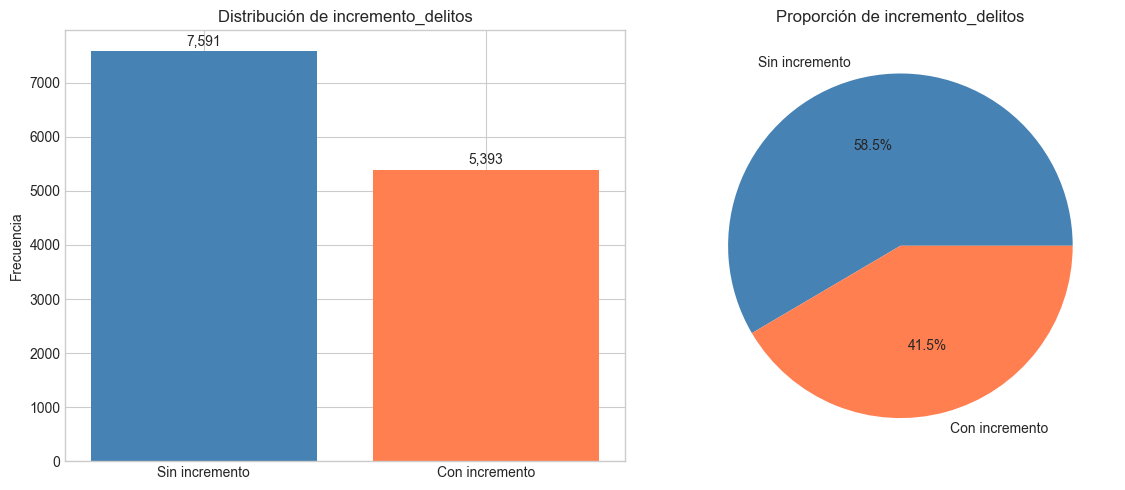

In [7]:
# Visualización incremento_delitos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

labels = ['Sin incremento', 'Con incremento']
colors = ['steelblue', 'coral']

# Barplot
ax1 = axes[0]
bars = ax1.bar(labels, incremento_counts.values, color=colors)
ax1.set_ylabel('Frecuencia')
ax1.set_title('Distribución de incremento_delitos')
for bar, val in zip(bars, incremento_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, val + 100, f'{val:,}', ha='center')

# Pie chart
ax2 = axes[1]
ax2.pie(incremento_counts.values, labels=labels, autopct='%1.1f%%', colors=colors)
ax2.set_title('Proporción de incremento_delitos')

plt.tight_layout()
plt.show()

## 3. Análisis de Features por Target

C:\Users\57318\AppData\Local\Temp\ipykernel_1020\553522923.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='nivel_riesgo', y='total_delitos', order=order, palette=palette, ax=ax)


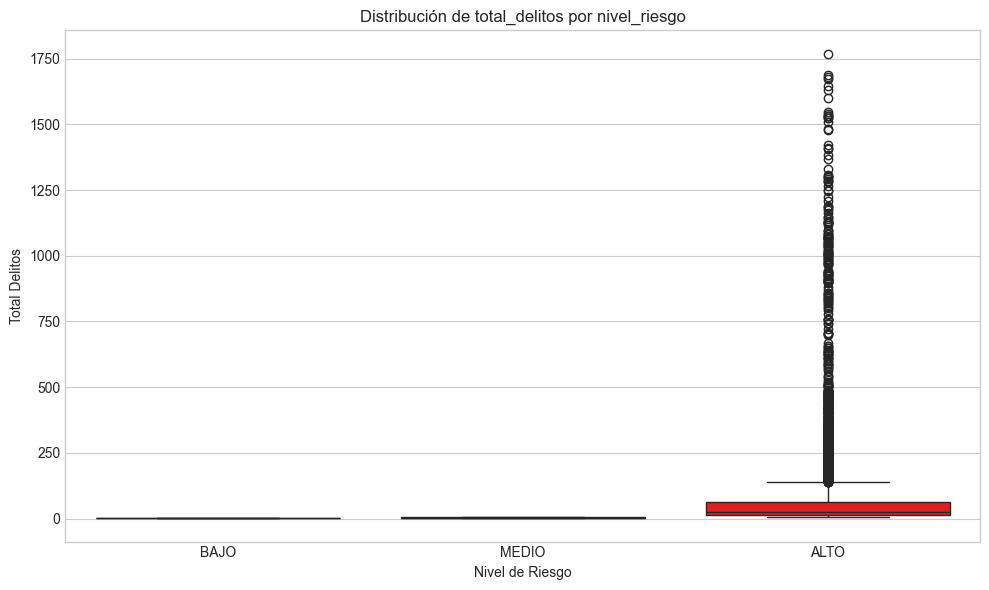


Estadísticas de total_delitos por nivel_riesgo:
               count    mean     std  min   25%   50%   75%     max
nivel_riesgo                                                       
ALTO          4372.0  104.60  218.62  8.0  12.0  25.0  63.0  1769.0
BAJO          4424.0    1.45    0.50  1.0   1.0   1.0   2.0     2.0
MEDIO         4188.0    4.41    1.34  3.0   3.0   4.0   5.0     7.0


C:\Users\57318\AppData\Local\Temp\ipykernel_1020\553522923.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('nivel_riesgo')['total_delitos'].describe().round(2))


In [8]:
# Distribución de total_delitos por nivel_riesgo
fig, ax = plt.subplots(figsize=(10, 6))

order = ['BAJO', 'MEDIO', 'ALTO']
palette = {'BAJO': 'green', 'MEDIO': 'orange', 'ALTO': 'red'}

sns.boxplot(data=df, x='nivel_riesgo', y='total_delitos', order=order, palette=palette, ax=ax)
ax.set_title('Distribución de total_delitos por nivel_riesgo')
ax.set_xlabel('Nivel de Riesgo')
ax.set_ylabel('Total Delitos')

plt.tight_layout()
plt.show()

# Estadísticas por grupo
print("\nEstadísticas de total_delitos por nivel_riesgo:")
print(df.groupby('nivel_riesgo')['total_delitos'].describe().round(2))

C:\Users\57318\AppData\Local\Temp\ipykernel_1020\2616809065.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  riesgo_por_anio = df.groupby(['anio', 'nivel_riesgo']).size().unstack(fill_value=0)
C:\Users\57318\AppData\Local\Temp\ipykernel_1020\2616809065.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  riesgo_por_mes = df.groupby(['mes', 'nivel_riesgo']).size().unstack(fill_value=0)


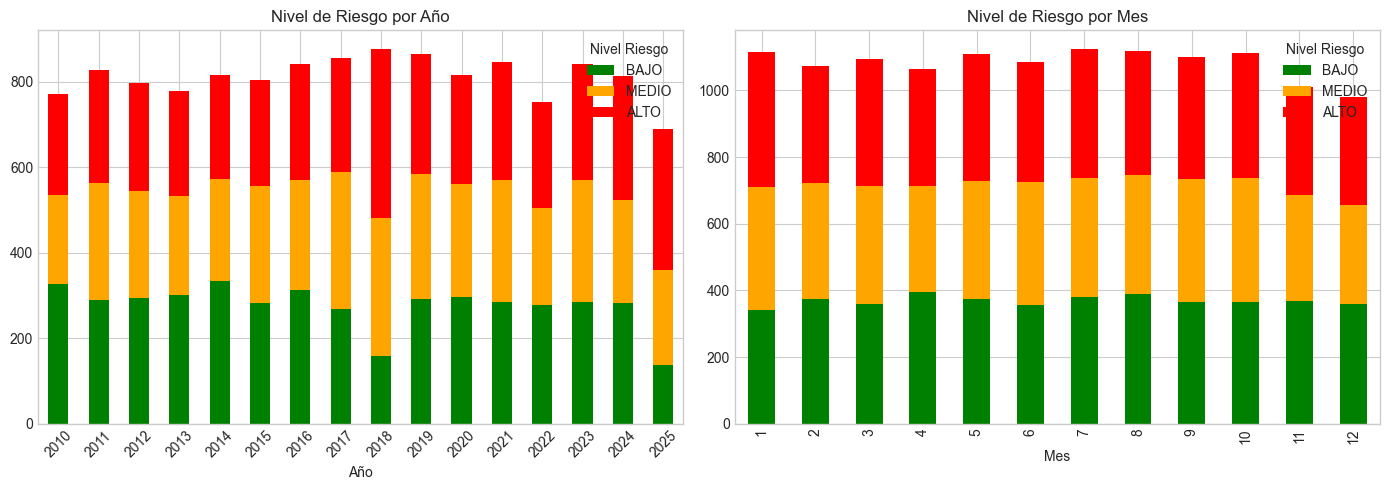

In [9]:
# Análisis temporal por nivel_riesgo
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Por año
riesgo_por_anio = df.groupby(['anio', 'nivel_riesgo']).size().unstack(fill_value=0)
riesgo_por_anio = riesgo_por_anio[['BAJO', 'MEDIO', 'ALTO']]
riesgo_por_anio.plot(kind='bar', stacked=True, ax=axes[0], color=['green', 'orange', 'red'])
axes[0].set_title('Nivel de Riesgo por Año')
axes[0].set_xlabel('Año')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Nivel Riesgo')

# Por mes
riesgo_por_mes = df.groupby(['mes', 'nivel_riesgo']).size().unstack(fill_value=0)
riesgo_por_mes = riesgo_por_mes[['BAJO', 'MEDIO', 'ALTO']]
riesgo_por_mes.plot(kind='bar', stacked=True, ax=axes[1], color=['green', 'orange', 'red'])
axes[1].set_title('Nivel de Riesgo por Mes')
axes[1].set_xlabel('Mes')
axes[1].legend(title='Nivel Riesgo')

plt.tight_layout()
plt.show()

## 4. Correlaciones

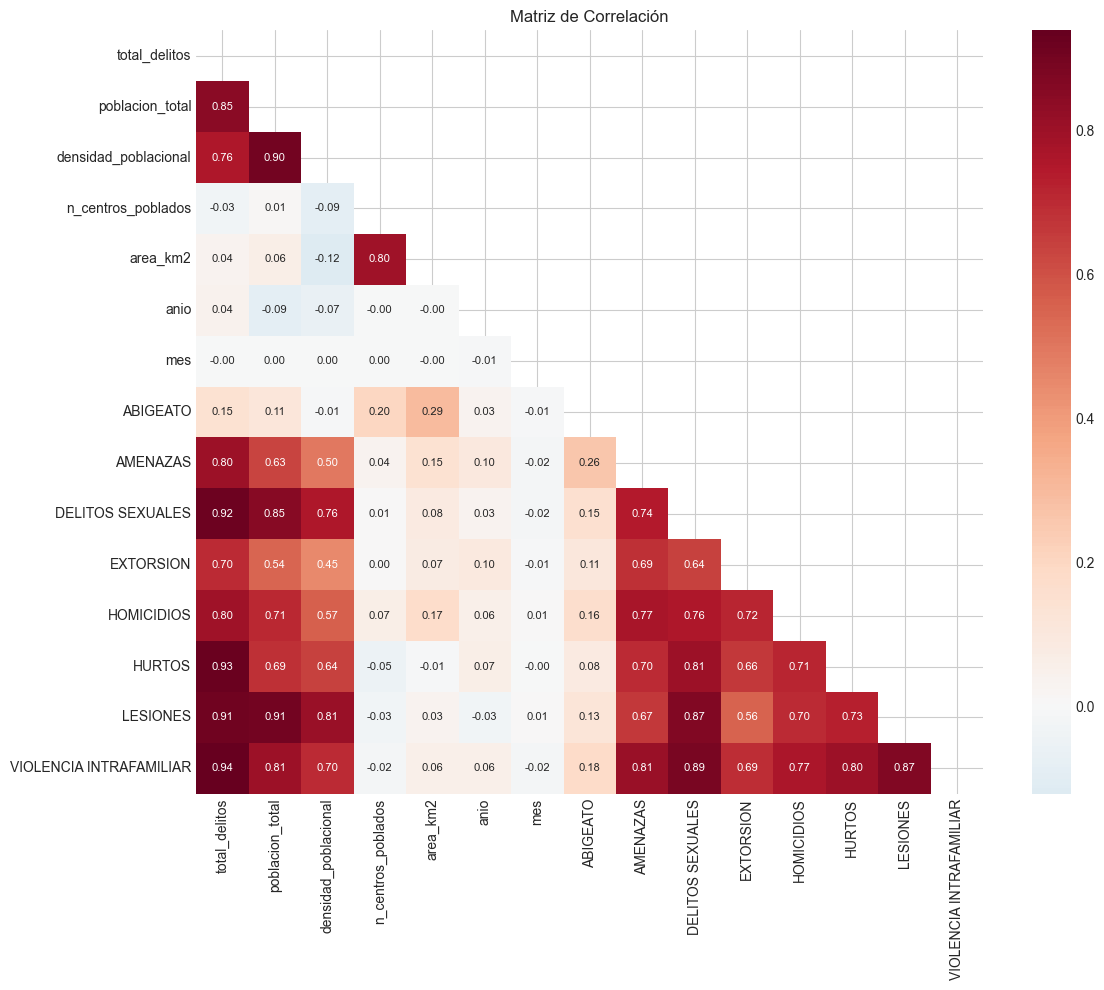

In [10]:
# Seleccionar features numéricas relevantes
feature_cols = ['total_delitos', 'poblacion_total', 'densidad_poblacional', 
                'n_centros_poblados', 'area_km2', 'anio', 'mes']

# Agregar columnas de delitos si existen
delito_cols = [c for c in df.columns if c.startswith('tasa_') or c in 
               ['ABIGEATO', 'AMENAZAS', 'DELITOS SEXUALES', 'EXTORSION', 'HOMICIDIOS', 'HURTOS', 'LESIONES', 'VIOLENCIA INTRAFAMILIAR']]
feature_cols.extend([c for c in delito_cols if c in df.columns][:8])

# Matriz de correlación
fig, ax = plt.subplots(figsize=(12, 10))
corr_matrix = df[feature_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, ax=ax, annot_kws={'size': 8})
ax.set_title('Matriz de Correlación')
plt.tight_layout()
plt.show()

## 5. Conclusiones y Recomendaciones

In [12]:
print("=" * 60)
print("CONCLUSIONES")
print("=" * 60)

# Análisis nivel_riesgo
ratio_riesgo = riesgo_counts.max() / riesgo_counts.min()
print(f"\nnivel_riesgo:")
print(f"  Clases: {list(riesgo_counts.index)}")
print(f"  Ratio max/min: {ratio_riesgo:.2f}")
if ratio_riesgo < 1.5:
    print(f"  Status: ✅ MUY BALANCEADO - Ideal para clasificación")
else:
    print(f"  Status: ⚡ Leve desbalance - Considerar class_weight")

# Análisis incremento_delitos
ratio_incremento = incremento_counts.max() / incremento_counts.min()
print(f"\nincremento_delitos:")
print(f"  Clases: 0 (sin incremento), 1 (con incremento)")
print(f"  Ratio max/min: {ratio_incremento:.2f}")
if ratio_incremento < 2:
    print(f"  Status: ✅ BALANCEADO - No requiere ajustes")
else:
    print(f"  Status: ⚡ MODERADO - Usar class_weight='balanced'")

print("\n" + "=" * 60)

CONCLUSIONES

nivel_riesgo:
  Clases: ['BAJO', 'ALTO', 'MEDIO']
  Ratio max/min: 1.06
  Status: ✅ MUY BALANCEADO - Ideal para clasificación

incremento_delitos:
  Clases: 0 (sin incremento), 1 (con incremento)
  Ratio max/min: 1.41
  Status: ✅ BALANCEADO - No requiere ajustes



## 6. Guardar Dataset Procesado

In [13]:
# Ruta para guardar dataset procesado
PROCESSED_DATA_PATH = BASE_DIR / 'data' / 'model' / 'classification_monthly_dataset_processed.parquet'

# Crear carpeta si no existe
PROCESSED_DATA_PATH.parent.mkdir(parents=True, exist_ok=True)

# Guardar dataset
df.to_parquet(PROCESSED_DATA_PATH, index=False)
print(f"✓ Dataset procesado guardado: {PROCESSED_DATA_PATH}")
print(f"  Shape: {df.shape}")
print(f"\nNotas:")
print(f"  - nivel_riesgo: Balanceado - Sin ajustes requeridos")
print(f"  - incremento_delitos: Balanceado - Sin ajustes requeridos")
print(f"  - Dataset listo para modelado")

✓ Dataset procesado guardado: C:\Users\57318\Downloads\mintic\Datos-al-Ecosistema\data\model\classification_monthly_dataset_processed.parquet
  Shape: (12984, 62)

Notas:
  - nivel_riesgo: Balanceado - Sin ajustes requeridos
  - incremento_delitos: Balanceado - Sin ajustes requeridos
  - Dataset listo para modelado
